In [91]:
import sys
#sys.path.remove('/Users/evsi8432/Documents/Research/CarHHMM-DFT/Repository/Code')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import vonmises
from scipy.stats import multivariate_normal
from scipy.stats import gaussian_kde
from scipy.stats import circstd
from scipy.special import iv
from scipy.special import expit
from scipy.special import logit
from scipy.special import logsumexp
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
from scipy.optimize import LinearConstraint
from scipy.signal import convolve
from scipy.interpolate import interp1d

from copy import deepcopy

import importlib

import time
import pickle

In [92]:
import Preprocessor
import Parameters
import HHMM
import Visualisor
import optimizor

from optimizor import eta_2_Gamma
from optimizor import Gamma_2_eta
from optimizor import logdotexp

In [93]:
pXX = np.random.normal(size=(3,3))

print(pXX)

print(logsumexp(pXX))

print(np.exp(pXX - logsumexp(pXX)))

[[ 1.81661812  1.90237464  0.67014531]
 [ 0.17291126 -0.29669426 -0.77443888]
 [-0.94667597 -0.4273691   1.22827336]]
3.0752781911656166
[[0.28403436 0.30946708 0.0902535 ]
 [0.05489314 0.03432187 0.02128576]
 [0.01791792 0.03011755 0.15770882]]


# Initialize Parameters

In [94]:
# make parameters
pars = Parameters.Parameters()
pars.features = [{'Y':{'corr':False,'f':'normal'}}, # coarse-scale
                 {}]
pars.K = [3,1]
T = 10000

# Simulate Data

In [95]:
N = 3
X = np.zeros(T,dtype=int)
data = []

# define parameters
Gamma = np.array([[0.9,0.05,0.05],
                  [0.05,0.9,0.05],
                  [0.05,0.05,0.9]])
delta = np.ones(pars.K[0])/pars.K[0]

mus = [-1,0,1]
sigs = [np.exp(0),np.exp(-1.0),np.exp(1.0)]

for t in range(T):
    
    if t == 0:
        X[t] = np.random.choice(pars.K[0],p=delta)
    else:
        X[t] = np.random.choice(pars.K[0],p=Gamma[X[t-1]])

    data.append({'Y':mus[X[t]] + sigs[X[t]]*np.random.normal(),
                 'subdive_features':[]})

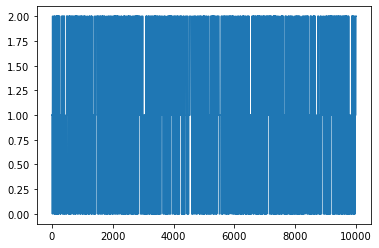

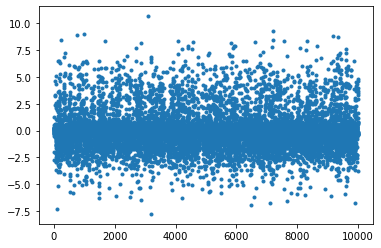

In [96]:
plt.plot(X)
plt.show()
plt.plot([x["Y"] for x in data],'.')
plt.show()

# Initialize optimizor and select intial values

In [97]:
# initialize objects
hhmm = HHMM.HHMM(pars,data)

hhmm.theta = [{'Y': {'mu': np.array([-4.0,  0.1,  0.8]),
                     'log_sig': np.array([0.0, -1.0, 1.0]),
                     'corr': np.array([0.0, 0.0, 0.0])}},
               [{}, {}, {}]]

hhmm.Gamma = [np.array([[0.50, 0.25, 0.25],
                        [0.25, 0.50, 0.25],
                        [0.25, 0.25, 0.50]]),
               [np.array([[1.]]), np.array([[1.]]), np.array([[1.]])]]

hhmm.eta = Gamma_2_eta(hhmm.Gamma)

In [98]:
#L = 0.5*(4/np.exp(0))**2 # lipschitz constant

importlib.reload(optimizor)

base_step = 1e-1

h2 = 1
h3 = 1

num_trains = 1

optim1 = optimizor.optimizor(hhmm)
optim1.step_size = 1.0 / T
optim1.param_bounds["Y"]["mu"] = [-100,100]
optim1.param_bounds["Y"]["log_sig"] = [-1,1]

# set theta and eta to true values
optim2 = optimizor.optimizor(hhmm)
optim2.step_size = 1.0 / T
optim2.param_bounds["Y"]["mu"] = [-100,100]
optim2.param_bounds["Y"]["log_sig"] = [-1,1]

# set theta and eta to true values
optim3 = optimizor.optimizor(hhmm)
optim3.step_size = 0.1 / T
optim3.param_bounds["Y"]["mu"] = [-100,100]
optim3.param_bounds["Y"]["log_sig"] = [-1,1]

# set theta and eta to true values
optim4 = optimizor.optimizor(hhmm)
optim4.step_size = 0.1 / T
optim4.param_bounds["Y"]["mu"] = [-100,100]
optim4.param_bounds["Y"]["log_sig"] = [-1,1]

# set theta and eta to true values
optim5 = optimizor.optimizor(hhmm)
optim5.step_size = 0.1 / T
optim5.param_bounds["Y"]["mu"] = [-100,100]
optim5.param_bounds["Y"]["log_sig"] = [-1,1]

# print values
print(optim1.theta)
print(optim1.eta)
print(optim1.param_bounds)
print(optim1.step_size)

# print values
print(optim2.theta)
print(optim2.eta)
print(optim2.param_bounds)
print(optim2.step_size)

# print values
print(optim3.theta)
print(optim3.eta)
print(optim3.param_bounds)
print(optim3.step_size)

# print values
print(optim4.theta)
print(optim4.eta)
print(optim4.param_bounds)
print(optim4.step_size)

# print values
print(optim5.theta)
print(optim5.eta)
print(optim5.param_bounds)
print(optim5.step_size)

[{'Y': {'mu': array([-4. ,  0.1,  0.8]), 'log_sig': array([ 0., -1.,  1.]), 'corr': array([0., 0., 0.])}}, [{}, {}, {}]]
[array([[ 0.        , -0.69314718, -0.69314718],
       [-0.69314718,  0.        , -0.69314718],
       [-0.69314718, -0.69314718,  0.        ]]), [array([[0.]]), array([[0.]]), array([[0.]])]]
{'Y': {'mu': [-100, 100], 'log_sig': [-1, 1]}}
0.0001
[{'Y': {'mu': array([-4. ,  0.1,  0.8]), 'log_sig': array([ 0., -1.,  1.]), 'corr': array([0., 0., 0.])}}, [{}, {}, {}]]
[array([[ 0.        , -0.69314718, -0.69314718],
       [-0.69314718,  0.        , -0.69314718],
       [-0.69314718, -0.69314718,  0.        ]]), [array([[0.]]), array([[0.]]), array([[0.]])]]
{'Y': {'mu': [-100, 100], 'log_sig': [-1, 1]}}
0.0001
[{'Y': {'mu': array([-4. ,  0.1,  0.8]), 'log_sig': array([ 0., -1.,  1.]), 'corr': array([0., 0., 0.])}}, [{}, {}, {}]]
[array([[ 0.        , -0.69314718, -0.69314718],
       [-0.69314718,  0.        , -0.69314718],
       [-0.69314718, -0.69314718,  0.       

# Train the HMM

In [99]:
num_epochs = 10

# do traditional optimization
optim1 = optimizor.optimizor(hhmm)
optim1.step_size = 0.0001
optim1.param_bounds["Y"]["mu"] = [-100,100]
optim1.param_bounds["Y"]["log_sig"] = [-1,1]

optim1.train_HHMM(num_epochs,h=T,num_trains=1,random_t=False,decay_ind=np.infty,method="IGD")

# do IGD
optim2 = optimizor.optimizor(hhmm)
optim2.step_size = 0.0001 / T
optim2.param_bounds["Y"]["mu"] = [-100,100]
optim2.param_bounds["Y"]["log_sig"] = [-1,1]

optim2.train_HHMM(num_epochs,h=1,num_trains=1,random_t=False,decay_ind=np.infty,method="IGD")

# do SAG
optim3 = optimizor.optimizor(hhmm)
optim3.step_size = 0.001 / T
optim3.param_bounds["Y"]["mu"] = [-100,100]
optim3.param_bounds["Y"]["log_sig"] = [-1,1]

optim3.train_HHMM(num_epochs,h=1,num_trains=1,random_t=True,decay_ind=np.infty,method="SAG")

# do SVRG
optim4 = optimizor.optimizor(hhmm)
optim4.step_size = 0.1 / T
optim4.param_bounds["Y"]["mu"] = [-100,100]
optim4.param_bounds["Y"]["log_sig"] = [-1,1]

optim4.train_HHMM(num_epochs,h=1,num_trains=1,random_t=True,m=T,decay_ind=np.infty,method="SVRG")

# do EM
optim5 = optimizor.optimizor(hhmm)

optim5.train_HHMM(num_epochs,method="EM")

finished epoch_num:  0
train locations:  [9999]
log-likelihood:  -21280.091398200737

finished epoch_num:  1
train locations:  [0]
log-likelihood:  -20657.173857971942

finished epoch_num:  2
train locations:  [9999]
log-likelihood:  -20323.074654513435

finished epoch_num:  3
train locations:  [0]
log-likelihood:  -20109.692621476886

finished epoch_num:  4
train locations:  [9999]
log-likelihood:  -19962.90486128129

finished epoch_num:  5
train locations:  [0]
log-likelihood:  -19852.86901969925

finished epoch_num:  6
train locations:  [9999]
log-likelihood:  -19766.05919354545

finished epoch_num:  7
train locations:  [0]
log-likelihood:  -19693.70311372384

finished epoch_num:  8
train locations:  [9999]
log-likelihood:  -19630.20401499055

finished epoch_num:  9
train locations:  [0]
log-likelihood:  -19571.746152326494

finished epoch_num:  0
train locations:  [9999]
log-likelihood:  -20806.227590781156

finished epoch_num:  1
train locations:  [0]
log-likelihood:  -20479.30964

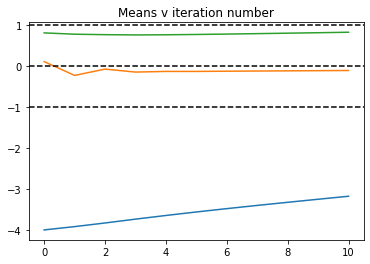

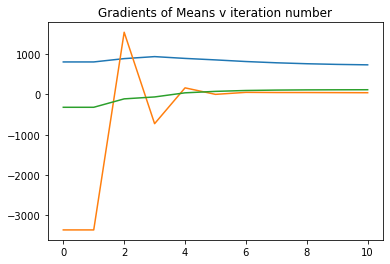

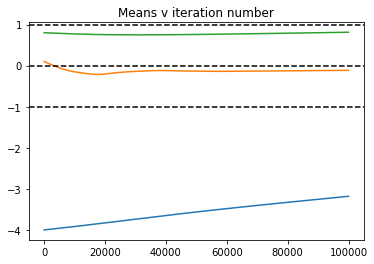

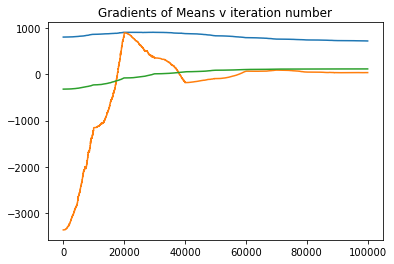

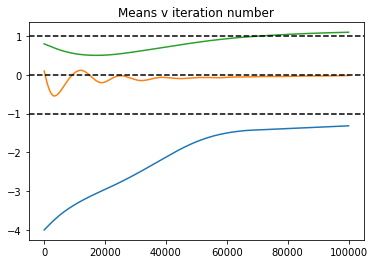

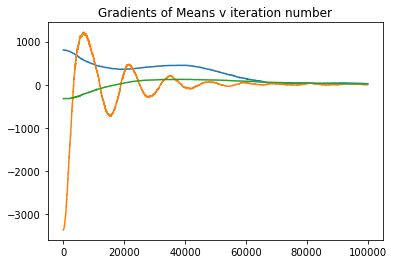

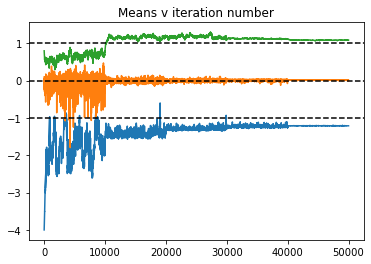

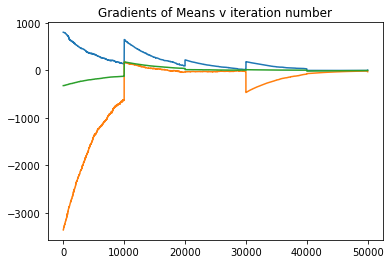

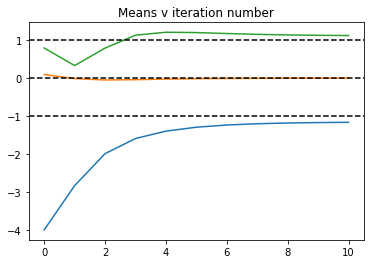

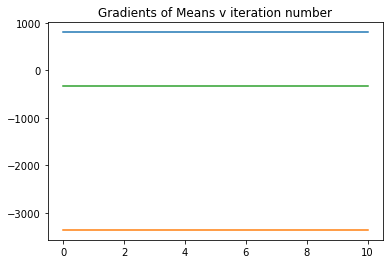

In [100]:
def plot_results(optim,iters=None):
    
    if iters is None:
        iters=len(optim.theta_trace)
    
    #plt.plot(optim.log_like_trace)
    #plt.title("Log-likelihood v iteration number")
    #plt.show()

    plt.plot([optim.theta_trace[i][0]['Y']['mu'][0] for i in range(iters)])
    plt.plot([optim.theta_trace[i][0]['Y']['mu'][1] for i in range(iters)])
    plt.plot([optim.theta_trace[i][0]['Y']['mu'][2] for i in range(iters)])
    plt.title("Means v iteration number")
    for hline in [-1,0,1]:
        plt.axhline(hline, c = 'k', linestyle = "--")
    #plt.axhline(optim.param_bounds['Y']['mu'][1], c = 'k', linestyle = "--")
    #plt.axhline(optim.param_bounds['Y']['mu'][0], c = 'k', linestyle = "--")
    #plt.axhline(optim.param_bounds['Y']['mu'][1], c = 'k', linestyle = "--")
    plt.show()
    
    #plt.plot([optim.theta_trace[i][0]['Y']['log_sig'][0] for i in range(len(optim.theta_trace))])
    #plt.plot([optim.theta_trace[i][0]['Y']['log_sig'][1] for i in range(len(optim.theta_trace))])
    #plt.plot([optim.theta_trace[i][0]['Y']['log_sig'][2] for i in range(len(optim.theta_trace))])
    #plt.axhline(optim.param_bounds['Y']['log_sig'][0], c = 'k', linestyle = "--")
    #plt.axhline(optim.param_bounds['Y']['log_sig'][1], c = 'k', linestyle = "--")
    #plt.title("Standard Deviations v iteration number")
    #plt.show()
    
    #plt.plot([optim.eta_trace[i][0][0,1] for i in range(len(optim.eta_trace))])
    #plt.plot([optim.eta_trace[i][0][0,2] for i in range(len(optim.eta_trace))])
    #plt.plot([optim.eta_trace[i][0][1,0] for i in range(len(optim.eta_trace))])
    #plt.plot([optim.eta_trace[i][0][1,2] for i in range(len(optim.eta_trace))])
    #plt.plot([optim.eta_trace[i][0][2,0] for i in range(len(optim.eta_trace))])
    #plt.plot([optim.eta_trace[i][0][2,1] for i in range(len(optim.eta_trace))])
    #plt.title("Eta v iteration number")
    #plt.show()

    if len(optim.grad_theta_trace) > 0:
        plt.plot([optim.grad_theta_trace[i][0]['Y']['mu'][0] for i in range(iters)])#range(len(optim.theta_trace))])
        plt.plot([optim.grad_theta_trace[i][0]['Y']['mu'][1] for i in range(iters)])#range(len(optim.theta_trace))])
        plt.plot([optim.grad_theta_trace[i][0]['Y']['mu'][2] for i in range(iters)])#range(len(optim.theta_trace))])
        plt.title("Gradients of Means v iteration number")
        plt.show()
    
    #plt.plot([optim.grad_theta_trace[i][0]['Y']['log_sig'][0] for i in range(len(optim.theta_trace))])
    #plt.plot([optim.grad_theta_trace[i][0]['Y']['log_sig'][1] for i in range(len(optim.theta_trace))])
    #plt.plot([optim.grad_theta_trace[i][0]['Y']['log_sig'][2] for i in range(len(optim.theta_trace))])
    #plt.title("Gradients of Standard Deviations v iteration number")
    #plt.show()
    
plot_results(optim1)
plot_results(optim2)
plot_results(optim3)
plot_results(optim4)
plot_results(optim5)

# Make sure that the likelihoods agree

-2182.8382846953878



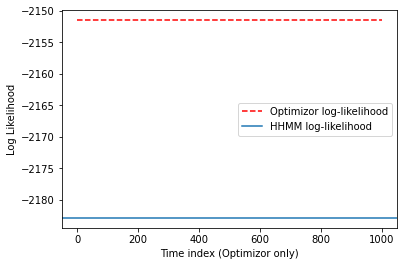

In [50]:
# using hhmm
print(hhmm.likelihood(data))
print("")
# do a forward pass and backwards pass
optim1.fwd_pass()
optim1.bwd_pass()

# print likelihood of evaluated at each time point
lls = [optim1.log_likelihood(t) for t in range(optim1.T)]
plt.plot(lls,"r--")
plt.axhline(hhmm.likelihood(data))
plt.legend(["Optimizor log-likelihood","HHMM log-likelihood"])
plt.xlabel("Time index (Optimizor only)")
plt.ylabel("Log Likelihood")
plt.show()

# Test that the gradients wrt $\theta$ agree

In [ ]:
# test gradient of mu_Y for state 0 using my hand-code (this is mu2)
optim.fwd_pass(data)
optim.bwd_pass(data)

autograds = np.zeros(optim.T)
finite_diffs = np.zeros(optim.T)

for t in range(optim.T):

    optim.grad_log_likelihood(t)
    autograds[t] = optim.d_log_like_d_theta[t][0]["Y"]["mu"][2]

    # test finte differences - optim
    eps = 0.0001
    
    # record current likelihood
    y1 = np.copy(optim.log_likelihood(t))
    
    # adjust parameters and record result
    optim.theta[0]['Y']['mu'][2] += eps
    optim.fwd_pass(data)
    optim.bwd_pass(data)
    y2 = np.copy(optim.log_likelihood(t))

    # record the finite difference
    finite_diffs[t] = (y2-y1)/eps

    # change the parameters back
    optim.theta[0]['Y']['mu'][2] += -eps
    optim.fwd_pass(data)
    optim.bwd_pass(data)
    
plt.plot(autograds)
plt.plot(finite_diffs)

# Test that the gradients wrt $\eta$ agree

In [ ]:
# test gradient of mu_Y for state 0 using my hand-code (this is mu2)
optim.fwd_pass(data)
optim.bwd_pass(data)

autograds = np.zeros(optim.T)
finite_diffs = np.zeros(optim.T)

for t in range(optim.T):

    optim.grad_log_likelihood(t)
    autograds[t] = optim.d_log_like_d_eta[t][0,1]

    # test finte differences - optim
    eps = 0.0001
    
    # record current likelihood
    y1 = np.copy(optim.log_likelihood(t))
    
    # adjust parameters and record result
    optim.eta[0][0,1] += eps
    optim.Gamma = eta_2_Gamma(optim.eta)
    optim.fwd_pass(data)
    optim.bwd_pass(data)
    y2 = np.copy(optim.log_likelihood(t))

    # record the finite difference
    finite_diffs[t] = (y2-y1)/eps

    # change the parameters back
    optim.eta[0][0,1] += -eps
    optim.Gamma = eta_2_Gamma(optim.eta)
    optim.fwd_pass(data)
    optim.bwd_pass(data)
    
print(autograds)
print(finite_diffs)
plt.plot(autograds)
plt.plot(finite_diffs)